In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
# Full path to the file
file_path = r"C:\Users\Kaleb\Downloads\Technical Content-20250612T081638Z-1-001\MachineLearningRating_v3\MachineLearningRating_v3.txt"

# Read the file using pandas with pipe ('|') as the delimiter
df = pd.read_csv(file_path, sep='|')


C:\Users\Kaleb\AppData\Local\Temp\ipykernel_18060\3579379550.py:5: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep='|')


In [14]:
print("Shape:", df.shape)
df.head(20)


Shape: (1000098, 52)


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
5,145247,12827,2015-01-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,3.256435,0.0
6,145247,12827,2015-04-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,50.474737,0.0
7,145247,12827,2015-06-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,35.332316,0.0
8,145247,12827,2015-08-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
9,145245,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,1.009474,0.0


In [33]:
df.describe(include='all')  # for both numeric and categorical
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 53 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   UnderwrittenCoverID       1000098 non-null  int64         
 1   PolicyID                  1000098 non-null  int64         
 2   TransactionMonth          1000098 non-null  datetime64[ns]
 3   IsVATRegistered           1000098 non-null  bool          
 4   Citizenship               1000098 non-null  object        
 5   LegalType                 1000098 non-null  object        
 6   Title                     1000098 non-null  object        
 7   Language                  1000098 non-null  object        
 8   Bank                      854137 non-null   object        
 9   AccountType               959866 non-null   object        
 10  MaritalStatus             991839 non-null   object        
 11  Gender                    990562 non-null   object

UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoors               

In [4]:
df.info()
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

NumberOfVehiclesInFleet    1000098
CrossBorder                 999400
CustomValueEstimate         779642
WrittenOff                  641901
Converted                   641901
Rebuilt                     641901
NewVehicle                  153295
Bank                        145961
AccountType                  40232
Gender                        9536
MaritalStatus                 8259
mmcode                         552
VehicleType                    552
make                           552
VehicleIntroDate               552
NumberOfDoors                  552
bodytype                       552
kilowatts                      552
cubiccapacity                  552
Cylinders                      552
Model                          552
CapitalOutstanding               2
dtype: int64

In [30]:
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_summary = pd.DataFrame({"MissingCount": missing, "PercentMissing": missing_percent})
missing_summary = missing_summary[missing_summary["MissingCount"] > 0].sort_values(by="MissingCount", ascending=False)
print(missing_summary)


                         MissingCount  PercentMissing
NumberOfVehiclesInFleet       1000098      100.000000
CrossBorder                    999400       99.930207
CustomValueEstimate            779642       77.956560
WrittenOff                     641901       64.183810
Converted                      641901       64.183810
Rebuilt                        641901       64.183810
NewVehicle                     153295       15.327998
Bank                           145961       14.594670
AccountType                     40232        4.022806
Gender                           9536        0.953507
MaritalStatus                    8259        0.825819
mmcode                            552        0.055195
VehicleType                       552        0.055195
make                              552        0.055195
VehicleIntroDate                  552        0.055195
NumberOfDoors                     552        0.055195
bodytype                          552        0.055195
kilowatts                   

In [36]:
# Summary stats for numeric columns
print(df.describe())

# Calculate standard deviation and variance
print(df[['TotalPremium', 'TotalClaims']].agg(['mean', 'std', 'var']))


       UnderwrittenCoverID      PolicyID               TransactionMonth  \
count         1.000098e+06  1.000098e+06                        1000098   
mean          1.048175e+05  7.956682e+03  2015-02-28 10:49:29.147423744   
min           1.000000e+00  1.400000e+01            2013-10-01 00:00:00   
25%           5.514300e+04  4.500000e+03            2015-01-01 00:00:00   
50%           9.408300e+04  7.071000e+03            2015-04-01 00:00:00   
75%           1.391900e+05  1.107700e+04            2015-06-01 00:00:00   
max           3.011750e+05  2.324600e+04            2015-08-01 00:00:00   
std           6.329371e+04  5.290039e+03                            NaN   

         PostalCode        mmcode  RegistrationYear      Cylinders  \
count  1.000098e+06  9.995460e+05      1.000098e+06  999546.000000   
mean   3.020601e+03  5.487770e+07      2.010225e+03       4.046642   
min    1.000000e+00  4.041200e+06      1.987000e+03       0.000000   
25%    8.270000e+02  6.005692e+07      2.008

In [56]:
df['TotalPremium'].describe()


count    1.000098e+06
mean     6.190550e+01
std      2.302845e+02
min     -7.825768e+02
25%      0.000000e+00
50%      2.178333e+00
75%      2.192982e+01
max      6.528260e+04
Name: TotalPremium, dtype: float64

In [58]:
(df['TotalPremium'] == 0).sum()


np.int64(381634)

In [66]:
# Define the range buckets you want
bins = [0, 1.0, 2.0, 5.0, 10.0, 20.0, 50.0, 100.0, float('inf')]

# Use pd.cut to bucket the values into intervals
premium_bins = pd.cut(df['TotalPremium'], bins=bins)

# Count how many values fall into each bin
bin_counts = premium_bins.value_counts().sort_index()

# Print the result
print("TotalPremium value ranges:")
print(bin_counts)


TotalPremium value ranges:
TotalPremium
(0.0, 1.0]        21846
(1.0, 2.0]        76281
(2.0, 5.0]       150458
(5.0, 10.0]       71761
(10.0, 20.0]      15134
(20.0, 50.0]      72724
(50.0, 100.0]     79514
(100.0, inf]     130458
Name: count, dtype: int64


c:\Users\Kaleb\OneDrive\Desktop\insurance-risk-modeling\acis-insurance-risk-modeling\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


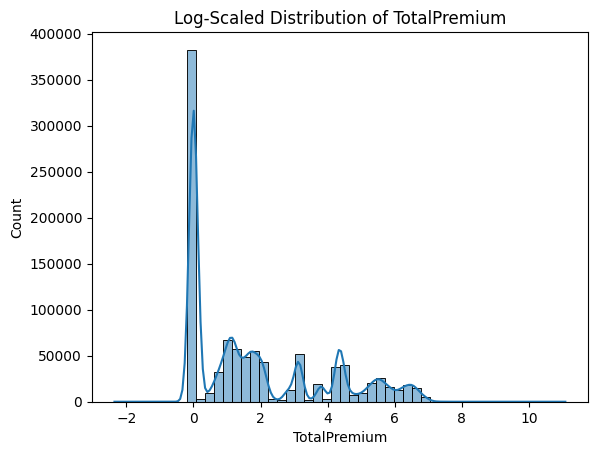

In [57]:
sns.histplot(np.log1p(df['TotalPremium']), kde=True, bins=50)
plt.title('Log-Scaled Distribution of TotalPremium')
plt.show()


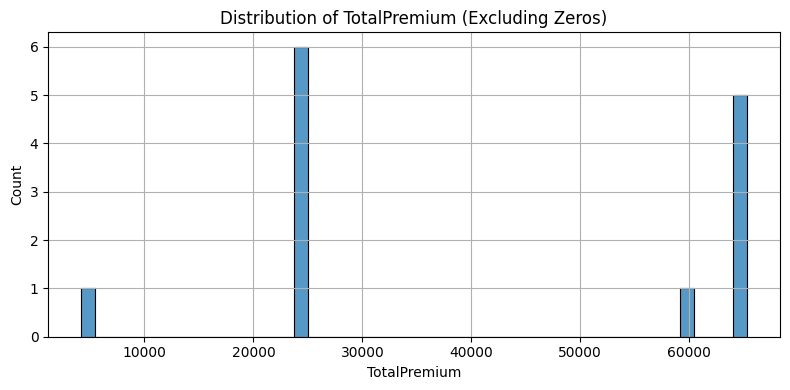

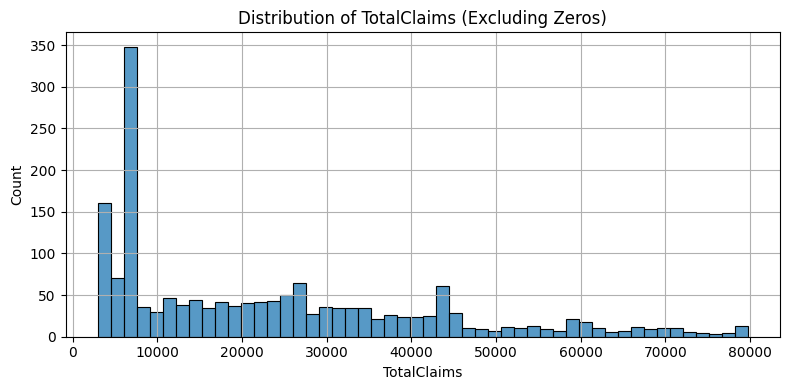

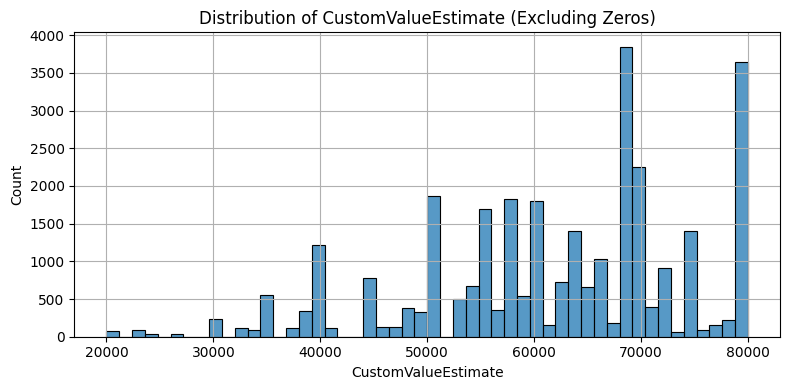

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in ['TotalPremium', 'TotalClaims', 'CustomValueEstimate']:
    plt.figure(figsize=(8, 4))
    
   # Exclude zero and NaN values
    data = df[col].dropna()
    data = data[(data > 3000) & (data <= 80000)]  # Keep only values between 0 and 3000

    
    sns.histplot(data, bins=50, stat='count', kde=False)
    
    plt.title(f'Distribution of {col} (Excluding Zeros)')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


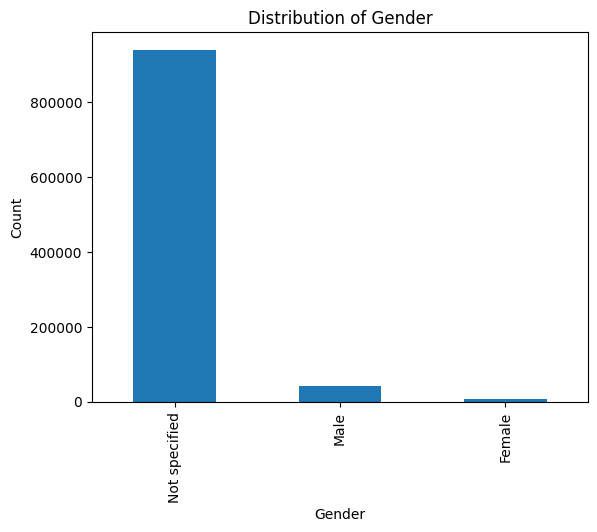

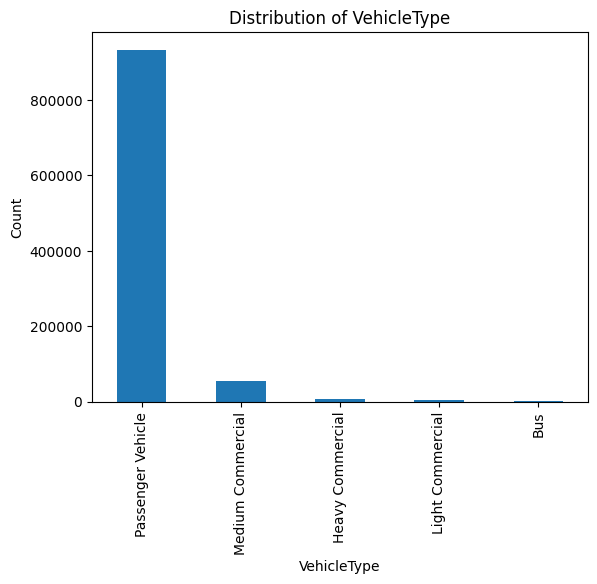

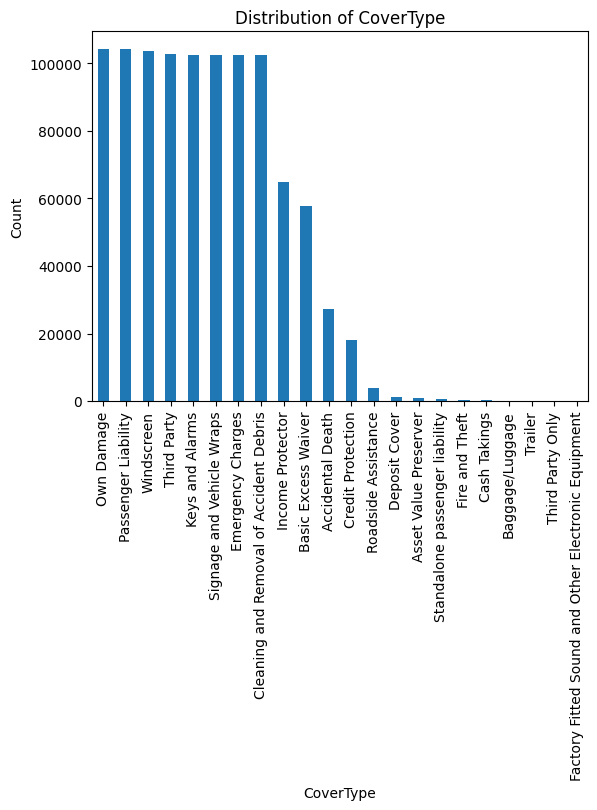

In [16]:
# Bar charts for categorical
for col in ['Gender', 'VehicleType', 'CoverType']:
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.ylabel('Count')
    plt.show()

In [8]:
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']
# Avoid division by zero
df['LossRatio'] = df['LossRatio'].replace([float('inf'), -float('inf')], 0).fillna(0)

print(f"Overall Portfolio Loss Ratio: {df['LossRatio'].mean():.4f}")


Overall Portfolio Loss Ratio: 0.2164


In [13]:
# By Province
print(df.groupby('Province')['LossRatio'].mean().sort_values())




Province
Free State       0.077792
Northern Cape    0.116388
Eastern Cape     0.152974
KwaZulu-Natal    0.174868
North West       0.178830
Western Cape     0.193640
Mpumalanga       0.235858
Limpopo          0.252857
Gauteng          0.262216
Name: LossRatio, dtype: float64


In [14]:
# By VehicleType
print(df.groupby('VehicleType')['LossRatio'].mean().sort_values())



VehicleType
Bus                  0.000000
Passenger Vehicle    0.208682
Medium Commercial    0.305509
Light Commercial     0.364845
Heavy Commercial     0.457233
Name: LossRatio, dtype: float64


In [15]:
# By Gender
print(df.groupby('Gender')['LossRatio'].mean().sort_values())

Gender
Male             0.157443
Not specified    0.218548
Female           0.247919
Name: LossRatio, dtype: float64


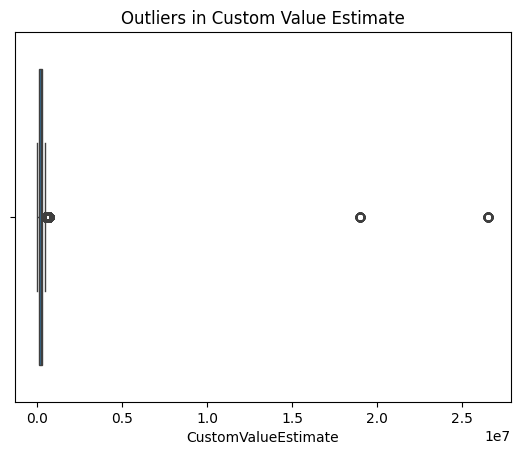

In [19]:
# CustomValueEstimate
sns.boxplot(x=df['CustomValueEstimate'])
plt.title('Outliers in Custom Value Estimate')
plt.show()

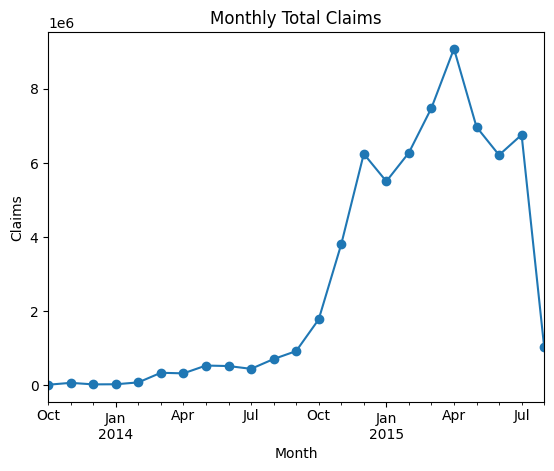

In [21]:
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])

# Claims per month
monthly_claims = df.groupby(df['TransactionMonth'].dt.to_period('M'))['TotalClaims'].sum()

monthly_claims.plot(kind='line', marker='o', title='Monthly Total Claims')
plt.xlabel('Month')
plt.ylabel('Claims')
plt.show()


In [36]:
# Exclude rows where TotalClaims is zero or NaN
filtered_df = df[df['TotalClaims'] > 0]

# Group by 'make' and calculate average claim
top_makes = filtered_df.groupby('make')['TotalClaims'].mean().sort_values(ascending=False)

# Top 10 makes by average claim
print("Top 10 makes by average claim amount:")
print(top_makes.head(10))

# Bottom 10 makes by average claim
print("\nBottom 10 makes by average claim amount:")
print(top_makes.tail(10))


Top 10 makes by average claim amount:
make
POLARSUN                               125197.843333
HYUNDAI                                 56663.492325
B.A.W                                   47856.245614
GOLDEN JOURNEY                          46169.723522
MERCEDES-BENZ                           34079.340852
IVECO                                   31495.539656
AUDI                                    30939.506443
VOLKSWAGEN                              30150.485741
CMC                                     30082.171180
FIAT                                    26721.907895
Name: TotalClaims, dtype: float64

Bottom 10 makes by average claim amount:
make
BMW                                    19259.886014
JINBEI                                 15490.435805
FOTON                                  12147.263158
SAIC                                   11333.600000
NISSAN                                 10248.199263
TOYOTA                                  8969.587719
CHEVROLET                         

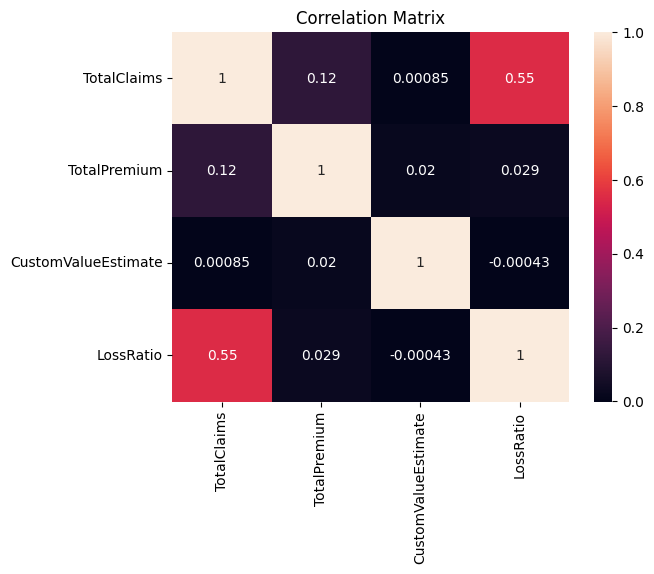

In [23]:
# Correlation
corr = df[['TotalClaims', 'TotalPremium', 'CustomValueEstimate', 'LossRatio']].corr()
sns.heatmap(corr, annot=True)
plt.title("Correlation Matrix")
plt.show()


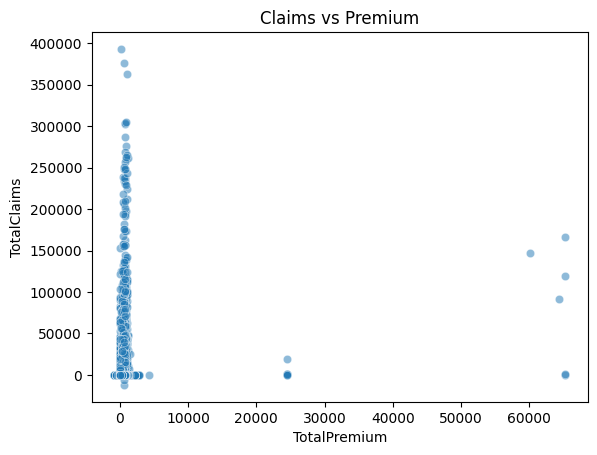

In [44]:
sns.scatterplot(x='TotalPremium', y='TotalClaims', data=df, alpha=0.5)
plt.title('Claims vs Premium')
plt.show()


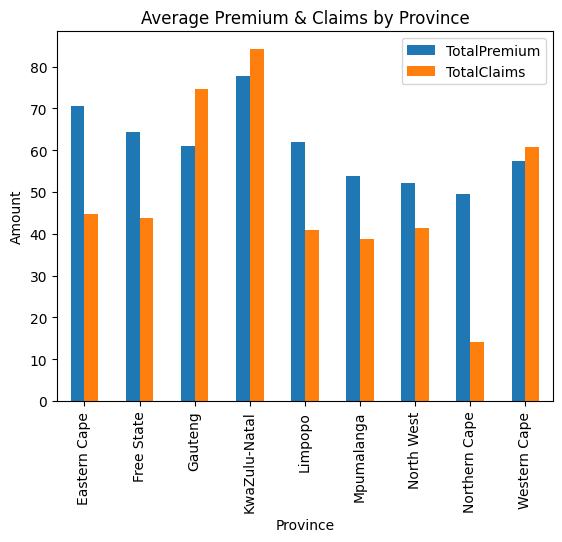

In [45]:
# If ZipCode or Province exists:
df.groupby('Province')[['TotalPremium', 'TotalClaims']].mean().plot(kind='bar')
plt.title('Average Premium & Claims by Province')
plt.ylabel('Amount')
plt.show()


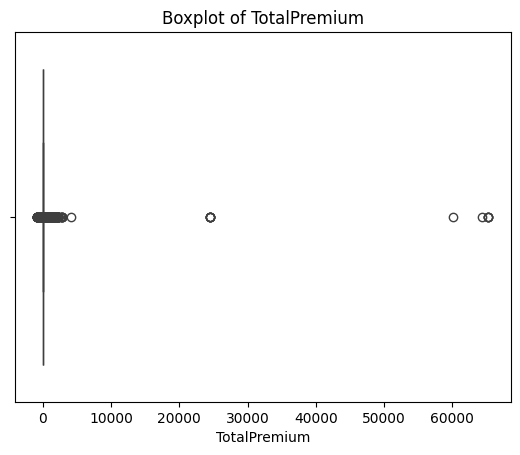

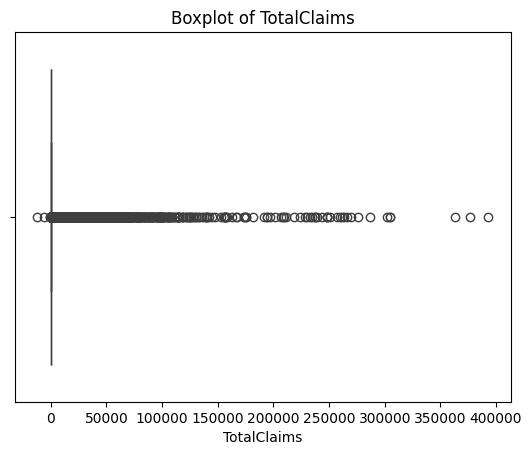

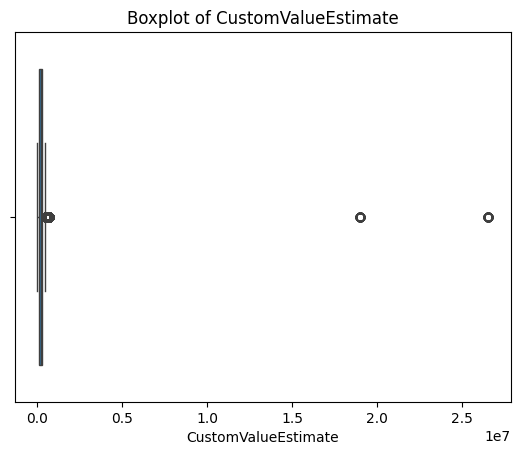

In [46]:
# Box plots for outlier detection
for col in ['TotalPremium', 'TotalClaims', 'CustomValueEstimate']:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


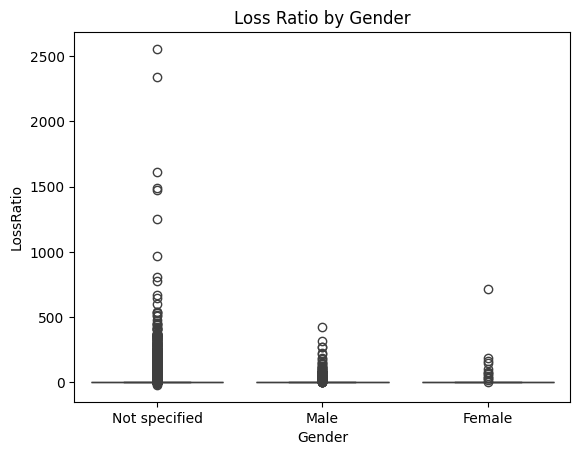

In [50]:
sns.boxplot(x='Gender', y='LossRatio', data=df)
plt.title('Loss Ratio by Gender')
plt.show()


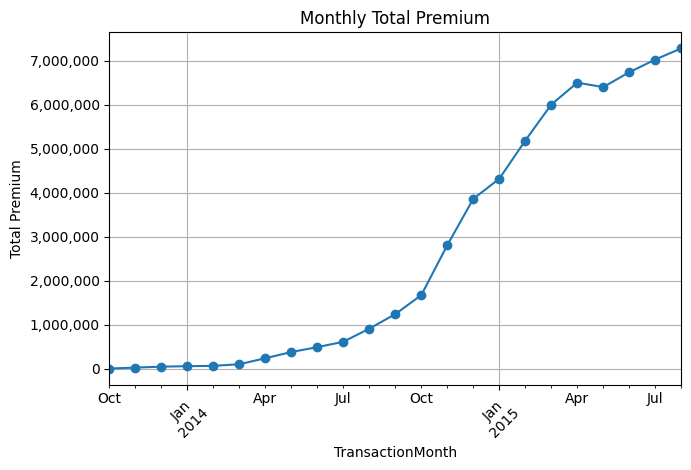

In [67]:
import matplotlib.ticker as mtick

monthly_premium = df.groupby(df['TransactionMonth'].dt.to_period('M'))['TotalPremium'].sum()
monthly_premium.index = monthly_premium.index.to_timestamp()

ax = monthly_premium.plot(marker='o', title='Monthly Total Premium')
plt.ylabel('Total Premium')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Format y-axis labels with commas, no scientific notation
ax.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()


In [64]:
print(monthly_premium)


TransactionMonth
2013-10-01    3.710635e+02
2013-11-01    2.130747e+04
2013-12-01    4.248475e+04
2014-01-01    5.408520e+04
2014-02-01    6.078844e+04
2014-03-01    9.857719e+04
2014-04-01    2.342743e+05
2014-05-01    3.759117e+05
2014-06-01    4.862194e+05
2014-07-01    6.092661e+05
2014-08-01    9.074381e+05
2014-09-01    1.237522e+06
2014-10-01    1.670355e+06
2014-11-01    2.805406e+06
2014-12-01    3.859253e+06
2015-01-01    4.315628e+06
2015-02-01    5.184930e+06
2015-03-01    6.002282e+06
2015-04-01    6.500269e+06
2015-05-01    6.400050e+06
2015-06-01    6.737930e+06
2015-07-01    7.026171e+06
2015-08-01    7.281043e+06
Freq: MS, Name: TotalPremium, dtype: float64


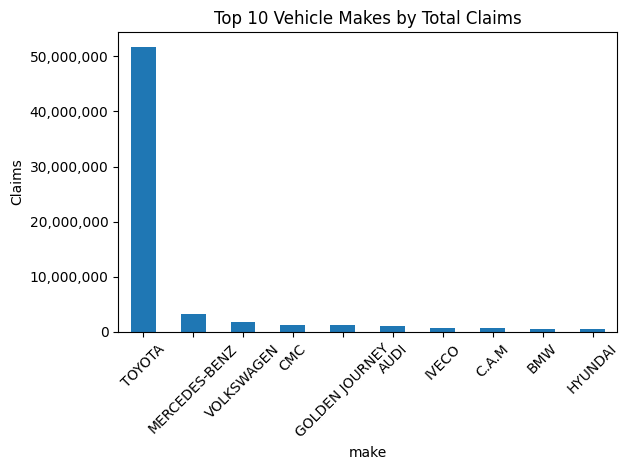

In [79]:
import matplotlib.ticker as mtick

df['make'] = df['make'].str.strip().str.upper()

top_make_volume = df.groupby('make')['TotalClaims'].sum().sort_values(ascending=False).head(10)

ax = top_make_volume.plot(kind='bar', title='Top 10 Vehicle Makes by Total Claims')
plt.ylabel('Claims')
plt.xticks(rotation=45)

# Format y-axis ticks with commas and no scientific notation
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()


In [78]:
# Strip whitespace and convert to uppercase or lowercase to standardize
df['make'] = df['make'].str.strip().str.upper()

# Now do the groupby again
claim_counts = df.groupby('make').size()
claim_sums = df.groupby('make')['TotalClaims'].sum()

top_makes = pd.DataFrame({
    'NumberOfClaims': claim_counts,
    'TotalClaimAmount': claim_sums
})

top_makes = top_makes.sort_values(by='NumberOfClaims', ascending=False).head(20)

print(top_makes)


                NumberOfClaims  TotalClaimAmount
make                                            
TOYOTA                  814446      5.177302e+07
MERCEDES-BENZ            45071      3.177251e+06
CMC                      21624      1.323616e+06
VOLKSWAGEN               20929      1.839180e+06
C.A.M                    16171      6.957082e+05
GOLDEN JOURNEY           14462      1.246583e+06
NISSAN/DATSUN            10997      3.735745e+05
JINBEI                   10434      3.407896e+05
IVECO                     8430      7.558930e+05
AUDI                      7407      1.021004e+06
NISSAN                    5462      5.124100e+04
BMW                       5317      4.814972e+05
FOTON                     3482      1.214726e+04
HYUNDAI                   2602      4.533079e+05
B.A.W                     2160      2.871375e+05
HUMMER                    1194      0.000000e+00
FIAT                       984      1.068876e+05
POLARSUN                   934      1.251978e+05
CHEVROLET           